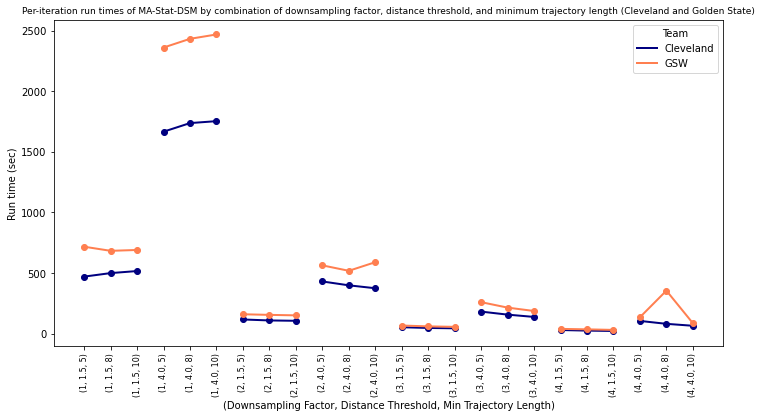

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a dataframe with the data
data_gsw = {
    'Downsampling Factor': [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4],
    'Distance Threshold': [1.5, 1.5, 1.5, 4, 4, 4, 1.5, 1.5, 1.5, 4, 4, 4, 1.5, 1.5, 1.5, 4, 4, 4, 1.5, 1.5, 1.5, 4, 4, 4],
    'Min Trajectory Length': [5, 8, 10, 5, 8, 10, 5, 8, 10, 5, 8, 10, 5, 8, 10, 5, 8, 10, 5, 8, 10, 5, 8, 10],
    'Run time (sec)': [717, 683, 690, 2362, 2434, 2470, 159, 154, 150, 563, 518, 589, 66, 59, 55, 259, 214, 186, 38.275, 34.4, 29.85, 134.4, 354.05, 85.325]
}

# Create a dataframe with the data for Cleveland
data_clev = {
    'Downsampling Factor': [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4],
    'Distance Threshold': [1.5, 1.5, 1.5, 4, 4, 4, 1.5, 1.5, 1.5, 4, 4, 4, 1.5, 1.5, 1.5, 4, 4, 4, 1.5, 1.5, 1.5, 4, 4, 4],
    'Min Trajectory Length': [5, 8, 10, 5, 8, 10, 5, 8, 10, 5, 8, 10, 5, 8, 10, 5, 8, 10, 5, 8, 10, 5, 8, 10],
    'Run time (sec)': [470, 499, 516, 1667, 1738, 1754, 116, 108, 105, 430, 398, 374, 52, 46, 43, 181, 156, 137, 29, 24, 21, 104, 80, 64]
}

df = pd.DataFrame(data_gsw)
df_clev = pd.DataFrame(data_clev)

# Pivot the dataframe to have a multi-level index with the combinations
df_pivot = df.pivot_table(index=['Downsampling Factor', 'Distance Threshold', 'Min Trajectory Length'], values='Run time (sec)')
df_pivot_clev = df_clev.pivot_table(index=['Downsampling Factor', 'Distance Threshold', 'Min Trajectory Length'], values='Run time (sec)')

# Define the colors for each team
color_dict = {'Cleveland': 'navy', 'GSW': 'coral'}

# Create a line chart with both teams' data
fig, ax = plt.subplots(figsize=(12,6))

# Plot each line segment separately
for team, data, style in [('Cleveland', df_pivot_clev, 'o-'), ('GSW', df_pivot, 'o-')]:
    color = color_dict.get(team, 'navy')
    ax.plot([], [], color=color, label=team, linewidth=2)
    for i in range(0, len(data), 3):
        ax.plot(range(i, i+3), data.iloc[i:i+3], style, color=color, linewidth=2)
        if i+3 < len(data):
            ax.plot([i+2, i+3], [data.iloc[i+2], data.iloc[i+3]], color=color, linewidth=2, linestyle='None')

# Set the chart properties
ax.legend(title='Team')
ax.set_xlabel('(Downsampling Factor, Distance Threshold, Min Trajectory Length)')
ax.set_ylabel('Run time (sec)')
ax.set_title('Per-iteration run times of MA-Stat-DSM by combination of downsampling factor, distance threshold, and minimum trajectory length (Cleveland and Golden State)', fontsize=9)
ax.set_xticks(range(len(df_pivot.index)))
ax.set_xticklabels(df_pivot.index, fontsize=8, rotation=90)

# Show the chart
plt.show()

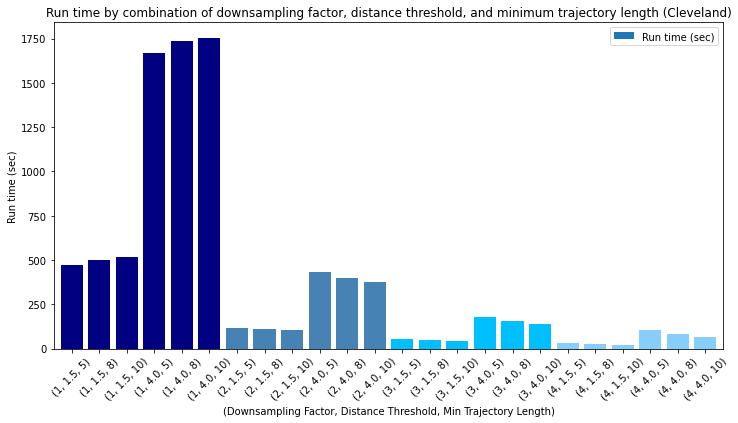

In [15]:
# OLD PLOTS 
# Cleveland
import pandas as pd
import matplotlib.pyplot as plt

# Create a dataframe with the data
data = {
    'Downsampling Factor': [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4],
    'Distance Threshold': [1.5, 1.5, 1.5, 4, 4, 4, 1.5, 1.5, 1.5, 4, 4, 4, 1.5, 1.5, 1.5, 4, 4, 4, 1.5, 1.5, 1.5, 4, 4, 4],
    'Min Trajectory Length': [5, 8, 10, 5, 8, 10, 5, 8, 10, 5, 8, 10, 5, 8, 10, 5, 8, 10, 5, 8, 10, 5, 8, 10],
    'Run time (sec)': [470, 499, 516, 1667, 1738, 1754, 116, 108, 105, 430, 398, 374, 52, 46, 43, 181, 156, 137, 29, 24, 21, 104, 80, 64]
}

df = pd.DataFrame(data)

# Pivot the dataframe to have a multi-level index with the combinations
df_pivot = df.pivot_table(index=['Downsampling Factor', 'Distance Threshold', 'Min Trajectory Length'], values='Run time (sec)')

# Define the colors for each downsampling factor
color_dict = {1: 'navy', 2: 'steelblue', 3: 'deepskyblue', 4: 'lightskyblue'}

# Create a grouped bar chart
ax = df_pivot.plot(kind='bar', figsize=(12,6), width=0.8)

# Set the color of each bar group based on its downsampling factor
for i, (factor, threshold, length) in enumerate(df_pivot.index):
    color = color_dict[factor]
    ax.patches[i].set_facecolor(color)

# Set the chart properties
plt.xlabel('(Downsampling Factor, Distance Threshold, Min Trajectory Length)')
plt.ylabel('Run time (sec)')
plt.title('Run time by combination of downsampling factor, distance threshold, and minimum trajectory length (Cleveland)')
plt.xticks(rotation=45)

# Show the chart
plt.show()


In [ ]:
# Golden State
import matplotlib.pyplot as plt

# Data
downsampling_factor = [1, 2, 3, 4]
total_runtime = [374274, 85280, 33579, 27054]
no_sub_matrices = [8, 6, 10, 7]

# Create figure and axes objects
fig, ax1 = plt.subplots()

# Set labels for the axes
ax1.set_xlabel('Downsampling factor')
ax1.set_ylabel('Total run time (sec)')

# Plot data for first y-axis
ax1.plot(downsampling_factor, total_runtime, color='blue', marker='o', zorder=2)
ax1.tick_params(axis='y')

# Create second y-axis and plot data for it
ax2 = ax1.twinx()
ax2.set_ylabel('No. Significant Sub-Matrices')
ax2.bar(downsampling_factor, no_sub_matrices, width=0.3, color='green', alpha=0.5, zorder=1)
ax2.tick_params(axis='y')

# Show the plot
plt.show()

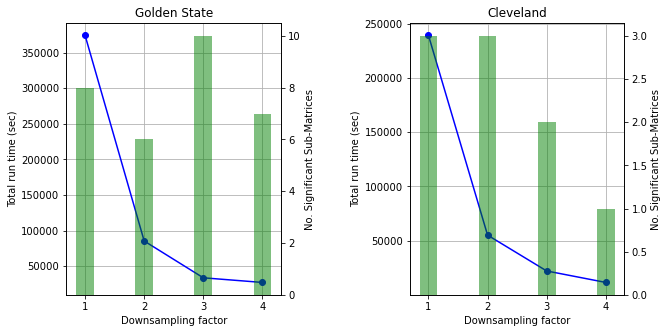

In [13]:
import matplotlib.pyplot as plt

# Data for Golden State plot
gs_downsampling_factor = [1, 2, 3, 4]
gs_total_runtime = [374274, 85280, 33579, 27054]
gs_no_sub_matrices = [8, 6, 10, 7]

# Data for Cleveland plot
cl_downsampling_factor = [1, 2, 3, 4]
cl_total_runtime = [239191, 55162, 22155, 11592]
cl_no_sub_matrices = [3, 3, 2, 1]

# Create figure and axes objects for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plot data for Golden State in first subplot
ax1.set_xlabel('Downsampling factor')
ax1.set_ylabel('Total run time (sec)')
ax1.plot(gs_downsampling_factor, gs_total_runtime, color='blue', marker='o', zorder=2)
ax1.tick_params(axis='y')
ax1.set_title('Golden State')
ax1.grid(True)

ax1_2 = ax1.twinx()
ax1_2.set_ylabel('No. Significant Sub-Matrices')
ax1_2.bar(gs_downsampling_factor, gs_no_sub_matrices, width=0.3, color='green', alpha=0.5, zorder=1)
ax1_2.tick_params(axis='y')

# Plot data for Cleveland in second subplot
ax2.set_xlabel('Downsampling factor')
ax2.set_ylabel('Total run time (sec)')
ax2.plot(cl_downsampling_factor, cl_total_runtime, color='blue', marker='o', zorder=2)
ax2.tick_params(axis='y')
ax2.set_title('Cleveland')
ax2.grid(True)

ax2_2 = ax2.twinx()
ax2_2.set_ylabel('No. Significant Sub-Matrices')
ax2_2.bar(cl_downsampling_factor, cl_no_sub_matrices, width=0.3, color='green', alpha=0.5, zorder=1)
ax2_2.tick_params(axis='y')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.6)

# Show the plots
plt.show()


In [ ]:
# Cleveland
import matplotlib.pyplot as plt

# Data
downsampling_factor = [1, 2, 3, 4]
total_runtime = [239191, 55162, 22155, 11592]
no_sub_matrices = [3, 3, 2, 1]

# Create figure and axes objects
fig, ax1 = plt.subplots()

# Set labels for the axes
ax1.set_xlabel('Downsampling factor')
ax1.set_ylabel('Total run time (sec)')

# Plot data for first y-axis
ax1.plot(downsampling_factor, total_runtime, color='blue', marker='o', zorder=2)
ax1.tick_params(axis='y')

# Create second y-axis and plot data for it
ax2 = ax1.twinx()
ax2.set_ylabel('No. Significant Sub-Matrices')
ax2.bar(downsampling_factor, no_sub_matrices, width=0.3, color='green', alpha=0.5, zorder=1)
ax2.tick_params(axis='y')

# Show the plot
plt.show()